# Proyecto 3

Esta tarea requiere que encuentres al menos dos datasets en la web que estén relacionados, y que visualices estos conjuntos de datos para responder una pregunta acerca de un tema amplio (por ejemplo: deportes, salud, actividad económica, comparaciones demográficas, climática, etc.) para la región de Salto, o Uruguay más ampliamente.

Debes combinar estos conjuntos de datos con datos de Uruguay y compararlos con otras regiones o paises. Por ejemplo, es posible que desee comparar un departamento de Uruguay, con una región de similares características en otro país. O datos de Uruguay comparados con otros países. En todos los casos al menos un archivo fuente debe ser de Uruguay o de uno de sus departamentos.

Puede elegir los conjuntos de datos a tu discreción. Los materiales delicados, confidenciales, ilícitos y patentados no son buenas opciones para conjuntos de datos para esta tarea.

Además, puedes conservar los datos en su idioma original, pero es una buena práctica también proporcionarlos con traducciones. Puedes proporcionar múltiples imágenes con las mismas visualizaciones pero en diferentes idiomas.

## Indicaciones

- Indica la región y la categoría de dominio de la que tratan los datasets (por ejemplo: Región: Salto, Uruguay; Categoría de dominio: deportes o atletismo).
- Debes formular una pregunta sobre la categoría de dominio y la región que identificaste como interesante.
- Debe proporcionar al menos dos enlaces a conjuntos de datos o datasets disponibles en la web. Estos pueden ser enlaces a archivos (csv o xls), o enlaces a sitios web que pueden tener datos en forma tabular, como páginas de Wikipedia.
- Debes generar al menos una imagen que responda a la pregunta de investigación que planteaste. Además de abordar la pregunta, esta imagen debe seguir los principios de Cairo de veracidad, funcionalidad, belleza y perspicacia.
- Debes contribuir con una breve justificación escrita (1-2 párrafos) de cómo su visualización aborda la pregunta de investigación planteada.
- Todo esto en un único archivo de Jupyter Notebook que debe contener las siguientes secciones:
  - Región y Dominio
  - Pregunta
  - Enlaces
  - Código con comentarios
  - Imágenes
  - Conclusión

## Consejos

- El gobierno de Uruguay tiene una política de Datos Abiertos y encontrarás información centralizada en el [Catálogo de Datos Abiertos](https://catalogodatos.gub.uy/).
- Wikipedia es una excelente fuente de datos y te recomendamos que la explores en busca de nuevas fuentes de datos.
- Varias agencias internacionales, como las [Naciones Unidas](https://data.un.org/), el [Banco Mundial](https://data.worldbank.org/) son otros excelentes lugares para buscar datos. En la WebAsignatura encontrarás más enlaces.
- Esta tarea requiere que conviertas y limpies los archivos de datos.
- Consulta en el foro de WebAsignatura para obtener consejos sobre cómo hacer esto de varias fuentes y comparte tus éxitos con tus compañeros.


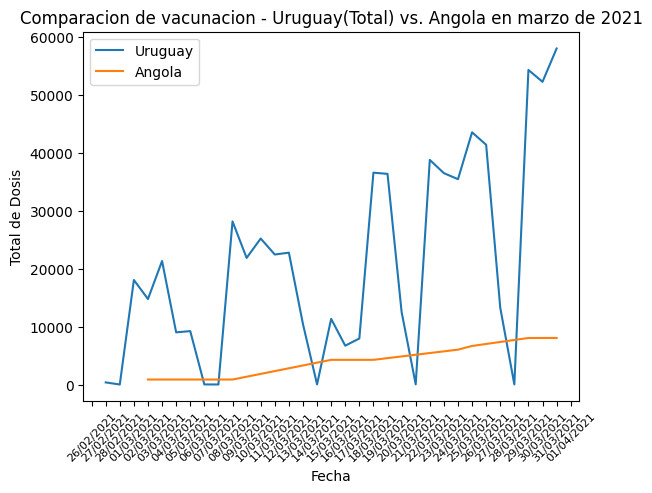

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

vacunas_uy = pd.read_csv ('actos_vacunales_uy.csv', delimiter= ';', encoding='latin1')
vacunas_mundial = pd.read_csv ('country_vaccinations.csv')
vacunas_mundial['date']=pd.to_datetime(vacunas_mundial['date'])

vacunas_uy['Fecha']=pd.to_datetime(vacunas_uy['Fecha'],format='%d/%m/%Y')
vacunas_uy['Total']=vacunas_uy[['Total Dosis 1', 'Total Dosis 2', 'Total Dosis 3', 'Total Dosis 4']].sum(axis=1)


#discriminar sacar solo dato mes marzo 2021

vacunas_mundial = vacunas_mundial[(vacunas_mundial['date']>='01/03/2021')&(vacunas_mundial['date']<='31/03/2021')&(vacunas_mundial['country']=='Angola')]

vacunas_uy = vacunas_uy[(vacunas_uy['Fecha']>='01/03/2021')&(vacunas_uy['Fecha']<='31/03/2021')]
# Configurar el formato de las fechas
date_format = mdates.DateFormatter('%d/%m/%Y')

# Crear un Locator de días para mostrar todas las fechas
day_locator = mdates.DayLocator()

# Aplicar el formato y el Locator al eje x
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(day_locator)
plt.xticks(rotation=45,fontsize=8)

plt.plot(vacunas_uy['Fecha'],vacunas_uy['Total'],label='Uruguay')
plt.plot(vacunas_mundial['date'],vacunas_mundial['daily_vaccinations'],label='Angola')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Total de Dosis')
plt.title('Comparacion de vacunacion - Uruguay(Total) vs. Angola en marzo de 2021')
plt.show()



